In [75]:
import xgboost as xgb
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt

%matplotlib inline

In [76]:
df_train= pd.read_csv('churn-bigml-80.csv')
df_test= pd.read_csv('churn-bigml-20.csv')

In [77]:
df_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [79]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [80]:
df_train.Churn.value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [81]:
df_train.Churn.value_counts()/len(df_train)

False    0.854464
True     0.145536
Name: Churn, dtype: float64

In [82]:
df_test.Churn.value_counts()

False    572
True      95
Name: Churn, dtype: int64

In [83]:
df_test.Churn.value_counts()/len(df_train)

False    0.214554
True     0.035634
Name: Churn, dtype: float64

In [84]:
df_train.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [85]:
df_test.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [86]:
len(df_test)/len(df_train)

0.2501875468867217

In [87]:
cat_columns = ['State', 'Area code', 'International plan', 'Voice mail plan']
num_columns = ['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls']

In [88]:
target = "Churn"
X_train = df_train.drop(columns=target)
y_train = df_train[target]
X_test = df_test.drop(columns=target)
y_test = df_test[target]

In [89]:
from sklearn.pipeline import Pipeline
cat_pipe = pipeline.Pipeline([
    ('imputer', impute.SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', preprocessing.OneHotEncoder(handle_unknown='error', drop="first"))
]) 

num_pipe = pipeline.Pipeline([
    ('imputer', impute.SimpleImputer(strategy='median')),
    ('scaler', preprocessing.StandardScaler()),
])

preprocessing_pipe = compose.ColumnTransformer([
    ("cat", cat_pipe, cat_columns),
    ("num", num_pipe, num_columns)
])

X_train = preprocessing_pipe.fit_transform(X_train)
X_test = preprocessing_pipe.transform(X_test)

In [90]:
est = linear_model.LogisticRegression(solver="liblinear")
est.fit(X_train, y_train)
y_test_pred = est.predict(X_test)
est.score(X_test, y_test)

0.8545727136431784

In [91]:
est = tree.DecisionTreeClassifier(max_depth=6)
est.fit(X_train, y_train)
y_test_pred = est.predict(X_test)
est.score(X_test, y_test)

0.9550224887556222

In [92]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       572
        True       0.88      0.79      0.83        95

    accuracy                           0.96       667
   macro avg       0.92      0.89      0.90       667
weighted avg       0.95      0.96      0.95       667



In [93]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[562,  10],
       [ 20,  75]])

In [94]:
eval_sets = [
    (X_train, y_train),
    (X_test, y_test)
]

cls = xgb.XGBRFClassifier(silent=False, 
                          scale_pos_weight=1,
                          learning_rate=0.1,  
                          colsample_bytree = 0.99,
                          subsample = 0.8,
                          objective='binary:logistic', 
                          n_estimators=100, 
                          reg_alpha = 0.003,
                          max_depth=10, 
                          gamma=10,
                          min_child_weight = 1
                          
                         )

print(cls.fit(X_train
              , y_train
              , eval_set = eval_sets
              , early_stopping_rounds = 10
              , eval_metric = ["error", "logloss"]
              , verbose = True
             ))
print("test accuracy: " , cls.score(X_test, y_test))

[0]	validation_0-error:0.044261	validation_0-logloss:0.617223	validation_1-error:0.043478	validation_1-logloss:0.617794
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=0.99, gamma=10, learning_rate=0.1,
                max_delta_step=0, max_depth=10, min_child_weight=1,
                missing=None, n_estimators=100, n_jobs=1, nthread=None,
                objective='binary:logistic', random_state=0, reg_alpha=0.003,
                reg_lambda=1, scale_pos_weight=1, seed=None, silent=False,
                subsample=0.8, verbosity=1)
test accuracy:  0.9565217391304348


In [95]:
cls.evals_result()

{'validation_0': {'error': [0.044261], 'logloss': [0.617223]},
 'validation_1': {'error': [0.043478], 'logloss': [0.617794]}}

In [96]:
y_test_pred = cls.predict(X_test)

In [97]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[566,   6],
       [ 23,  72]])

In [98]:
y_test_prob = cls.predict_proba(X_test)[:, 1]
y_test_prob

array([0.45316765, 0.5335887 , 0.5250111 , 0.4530683 , 0.4530947 ,
       0.45313406, 0.453099  , 0.4977873 , 0.4530718 , 0.45313567,
       0.4531979 , 0.45816997, 0.4530718 , 0.4530718 , 0.4530718 ,
       0.4530718 , 0.46233103, 0.45313406, 0.4530683 , 0.46748278,
       0.45309824, 0.4530683 , 0.45816997, 0.4530718 , 0.45313406,
       0.4530718 , 0.4530683 , 0.4530718 , 0.45316216, 0.45816645,
       0.4530718 , 0.4530683 , 0.45313054, 0.4530718 , 0.5302785 ,
       0.51322377, 0.4588441 , 0.45816997, 0.4531906 , 0.4530718 ,
       0.45316765, 0.5363099 , 0.45400557, 0.47299117, 0.45316765,
       0.4530683 , 0.47649875, 0.54035264, 0.45309824, 0.48678753,
       0.4530683 , 0.45312867, 0.45309824, 0.4530718 , 0.4530718 ,
       0.45313406, 0.5387744 , 0.4590555 , 0.53027934, 0.4530718 ,
       0.5384385 , 0.45316765, 0.52198046, 0.4530683 , 0.51238567,
       0.5396896 , 0.46337423, 0.4530683 , 0.45806226, 0.4530718 ,
       0.4530718 , 0.4530718 , 0.45313215, 0.4530683 , 0.52521

In [99]:
auc = metrics.roc_auc_score(y_test, y_test_prob)
auc

0.9227364740522637

In [100]:
ftr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

Text(0.5, 1.0, 'ROC, auc: 0.9227364740522637')

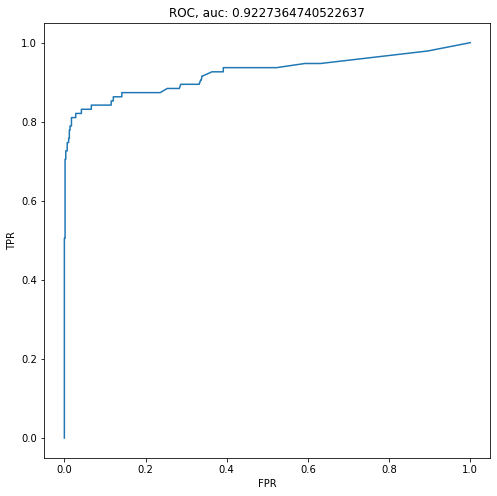

In [101]:
plt.rcParams['figure.figsize'] = 8,8
plt.plot(ftr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: " + str(auc))

In [102]:
params = {  'objective': "binary:logistic"
          , 'colsample_bytree': 0.9
          , 'learning_rate': 0.01
          , 'max_depth': 10
          , 'alpha': 0.5
          , 'min_child_weight': 1
          , 'subsample': 1
          , 'eval_metric': "auc"
          , 'n_estimators': 300
          , 'verbose': True
         }

data_dmatrix = xgb.DMatrix(data=X_train,label=y_train) 

cv_results = xgb.cv(dtrain=data_dmatrix
                    , params=params
                    , nfold=5
                    , maximize = "auc"
                    , num_boost_round=100
                    , early_stopping_rounds=10
                    , metrics=["logloss", "error", "auc"]
                    , as_pandas=True
                    , seed=123
                    , verbose_eval=True
                   )

cv_results

[0]	train-auc:0.921547+0.00807966	train-error:0.0365722+0.00345008	train-logloss:0.684844+0.000103504	test-auc:0.899048+0.0266364	test-error:0.0615158+0.0153549	test-logloss:0.6852+0.00025259
[1]	train-auc:0.923722+0.00586151	train-error:0.0406998+0.0117017	train-logloss:0.67701+0.000489657	test-auc:0.894572+0.0236566	test-error:0.067134+0.0178154	test-logloss:0.677775+0.000555036
[2]	train-auc:0.926744+0.00705294	train-error:0.0357282+0.00310769	train-logloss:0.669254+0.000625942	test-auc:0.897664+0.0256385	test-error:0.0626402+0.0198755	test-logloss:0.670309+0.00054787
[3]	train-auc:0.927818+0.00618428	train-error:0.0354468+0.00303818	train-logloss:0.661613+0.000675908	test-auc:0.899426+0.0260396	test-error:0.061516+0.0192964	test-logloss:0.662991+0.000731182
[4]	train-auc:0.927966+0.00606388	train-error:0.0352592+0.00276183	train-logloss:0.653936+0.000756659	test-auc:0.900003+0.0262861	test-error:0.0615166+0.0194438	test-logloss:0.655622+0.000974235
[5]	train-auc:0.927109+0.00796059

,train-auc-mean,train-auc-std,train-error-mean,train-error-std,train-logloss-mean,train-logloss-std,test-auc-mean,test-auc-std,test-error-mean,test-error-std,test-logloss-mean,test-logloss-std
0,0.921547,0.00808,0.036572,0.00345,0.684844,0.000104,0.899048,0.026636,0.061516,0.015355,0.6852,0.000253


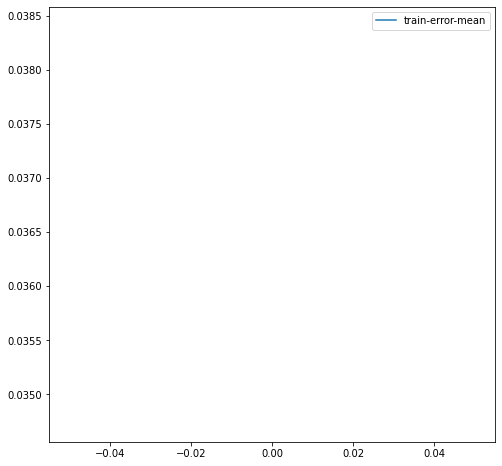

In [103]:
cv_results[["train-error-mean"]].plot()

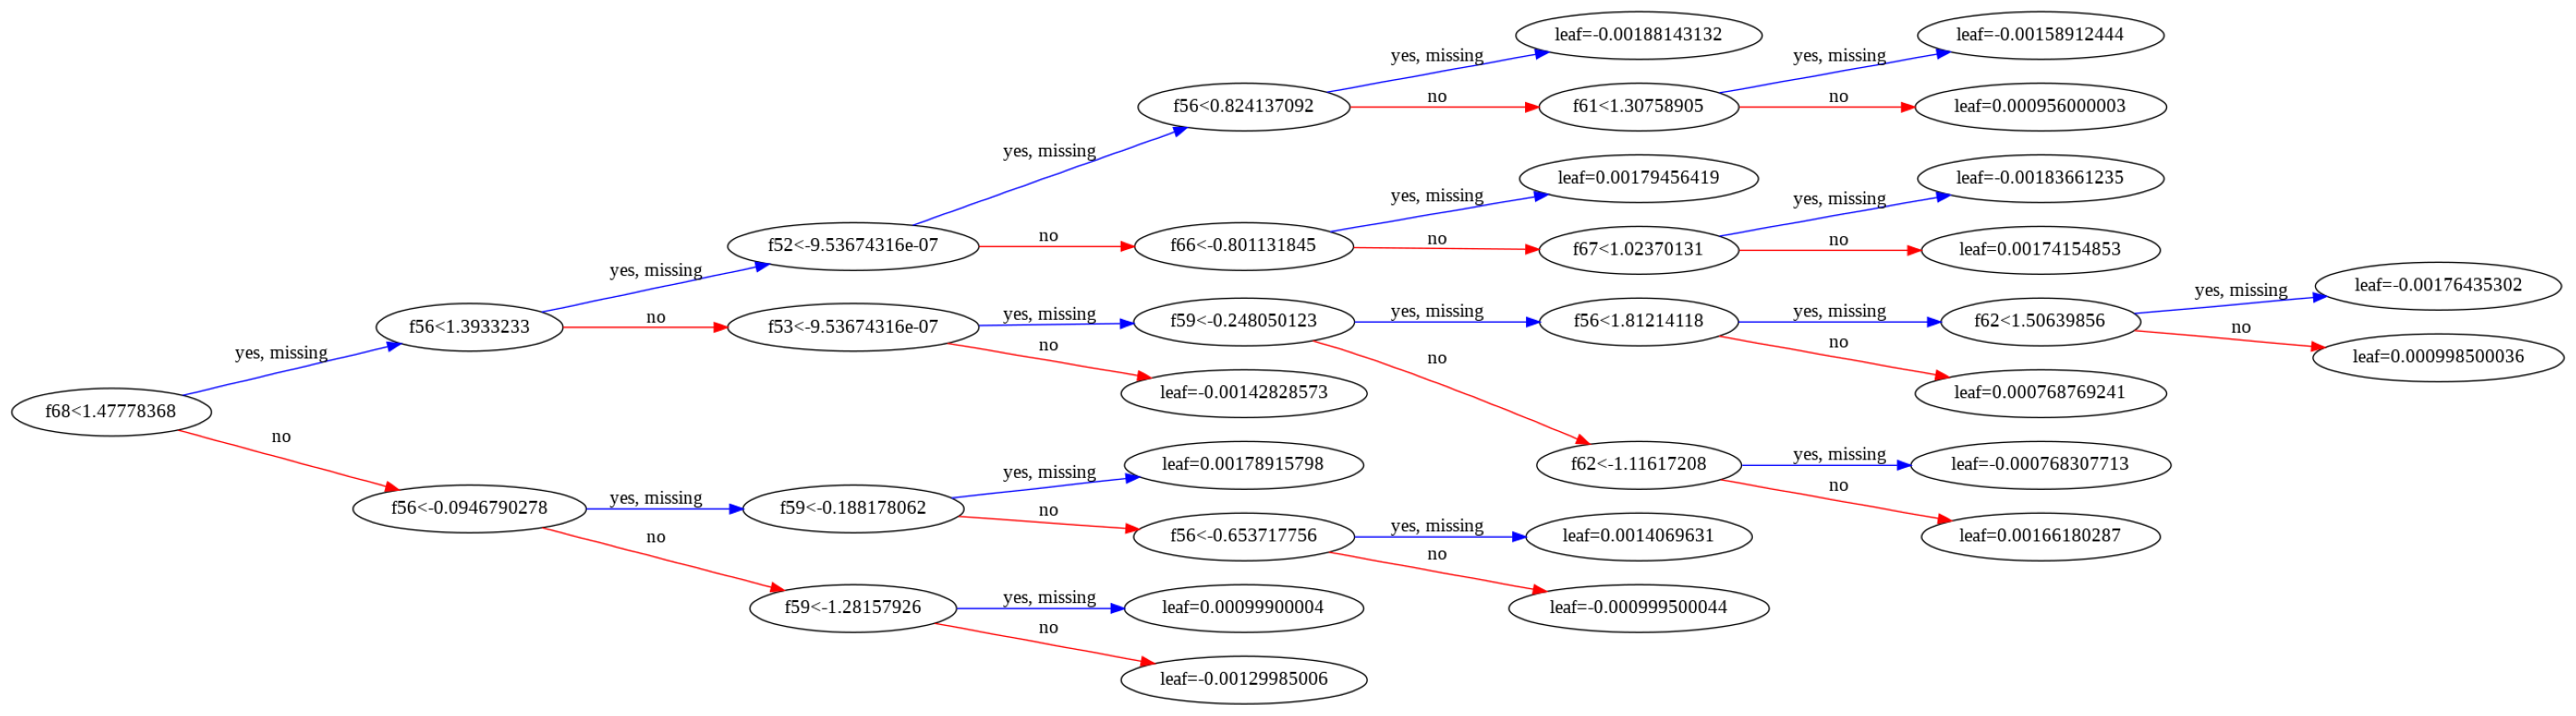

In [104]:
plt.rcParams['figure.figsize'] = 50,50

xgb.plot_tree(cls, num_trees=0, rankdir='LR')

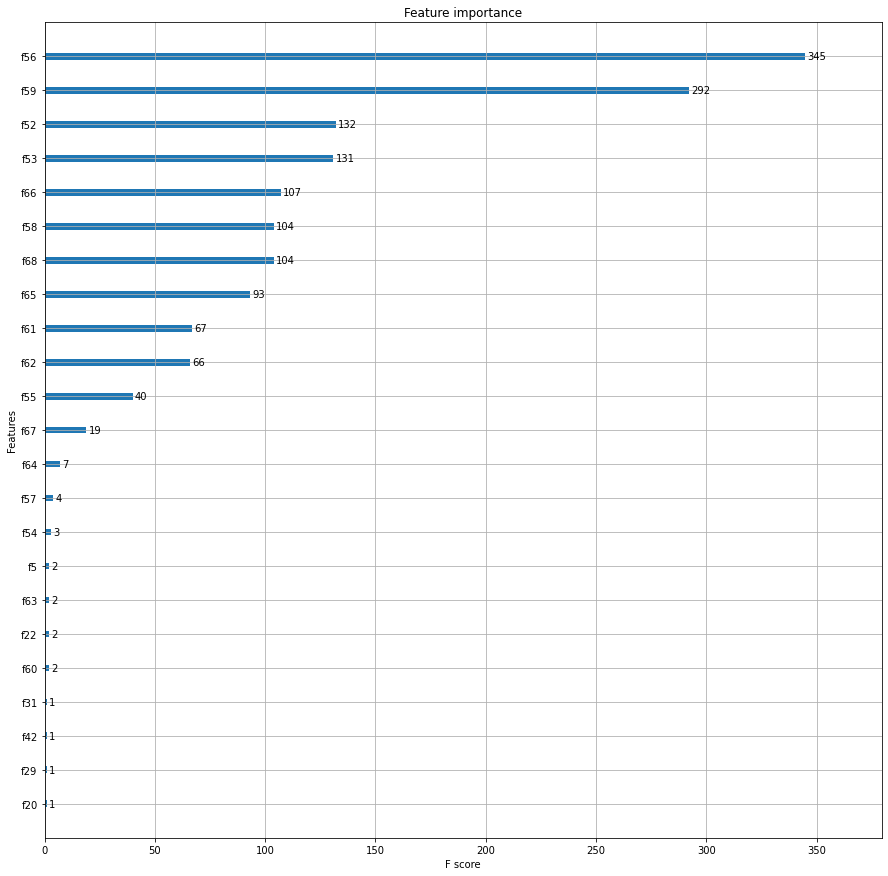

In [105]:
plt.rcParams['figure.figsize'] =15, 15
xgb.plot_importance(cls, )

In [106]:
cls.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00973155, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00475363, 0.        , 0.00578927, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00490839,
       0.        , 0.0035153 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00136   , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.10335825, 0.03968572, 0.00632024,
       0.04489457, 0.07302359, 0.00648075, 0.07613539, 0.03641787,
       0.00520401, 0.03985393, 0.02095367, 0.01982126, 0.02224666,
       0.09427269, 0.10676067, 0.09526194, 0.17925061], dtype=float32)

In [107]:
one_hot_encoder = preprocessing_pipe.transformers_[0][1].steps[1][1]
one_hot_encoder

OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [108]:
one_hot_encoder.get_feature_names()

array(['x0_AL', 'x0_AR', 'x0_AZ', 'x0_CA', 'x0_CO', 'x0_CT', 'x0_DC',
       'x0_DE', 'x0_FL', 'x0_GA', 'x0_HI', 'x0_IA', 'x0_ID', 'x0_IL',
       'x0_IN', 'x0_KS', 'x0_KY', 'x0_LA', 'x0_MA', 'x0_MD', 'x0_ME',
       'x0_MI', 'x0_MN', 'x0_MO', 'x0_MS', 'x0_MT', 'x0_NC', 'x0_ND',
       'x0_NE', 'x0_NH', 'x0_NJ', 'x0_NM', 'x0_NV', 'x0_NY', 'x0_OH',
       'x0_OK', 'x0_OR', 'x0_PA', 'x0_RI', 'x0_SC', 'x0_SD', 'x0_TN',
       'x0_TX', 'x0_UT', 'x0_VA', 'x0_VT', 'x0_WA', 'x0_WI', 'x0_WV',
       'x0_WY', 'x1_415', 'x1_510', 'x2_Yes', 'x3_Yes'], dtype=object)

In [109]:
preprocessing_pipe.transformers_[0][1]

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True,
                               fill_value='missing', missing_values=nan,
                               strategy='constant', verbose=0)),
                ('onehot',
                 OneHotEncoder(categories='auto', drop='first',
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='error', sparse=True))],
         verbose=False)

In [110]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}


cls = xgb.XGBRFClassifier(silent=False, 
                          scale_pos_weight=1,
                          learning_rate=0.01,  
                          colsample_bytree = 0.99,
                          subsample = 0.8,
                          objective='binary:logistic', 
                          n_estimators=100, 
                          reg_alpha = 0.003,
                          max_depth=10, 
                          gamma=10,
                          min_child_weight = 1
                         )

grid_search = model_selection.GridSearchCV(
    estimator=cls,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 12,
    cv = 10,
    verbose=True,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   12.6s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   51.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:  2.3min
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:  4.3min
[Parallel(n_jobs=12)]: Done 960 out of 960 | elapsed:  5.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRFClassifier(base_score=0.5, colsample_bylevel=1,
                                       colsample_bynode=0.8,
                                       colsample_bytree=0.99, gamma=10,
                                       learning_rate=0.01, max_delta_step=0,
                                       max_depth=10, min_child_weight=1,
                                       missing=None, n_estimators=100, n_jobs=1,
                                       nthread=None,
                                       objective='binary:logistic',
                                       random_state=0, reg_alpha=0.003,
                                       reg_lambda=1, scale_pos_weight=1,
                                       seed=None, silent=False, subsample=0.8,
                                       verbosity=1),
             iid='deprecated', n_jobs=12,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                      

In [111]:
grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 60}

In [112]:
grid_search.best_score_

0.909351067565142

In [113]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.694113,0.286738,0.029116,0.014339,0.1,2,60,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.835639,0.866509,0.836482,0.805556,0.904802,0.885234,0.893006,0.862765,0.823393,0.911104,0.862449,0.034330,91,0.877412,0.869744,0.878114,0.877448,0.870966,0.871039,0.865339,0.849461,0.879361,0.867079,0.870596,0.008453
1,1.239049,0.078558,0.041255,0.007499,0.1,2,100,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.835526,0.860436,0.836257,0.818545,0.897492,0.876687,0.894679,0.861380,0.823393,0.912007,0.861640,0.031286,94,0.877218,0.868136,0.878847,0.878813,0.867846,0.870669,0.868118,0.849454,0.879275,0.866852,0.870523,0.008576
2,1.583726,0.025936,0.044354,0.009023,0.1,2,140,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.838900,0.868477,0.836763,0.818207,0.903340,0.877024,0.895025,0.865536,0.823280,0.910539,0.863709,0.031614,85,0.880218,0.872757,0.878634,0.879509,0.871230,0.871711,0.868785,0.852758,0.879292,0.867060,0.872195,0.007918
3,2.047836,0.031049,0.046921,0.009645,0.1,2,180,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.838507,0.870445,0.836538,0.819838,0.904915,0.877024,0.894333,0.862419,0.819270,0.911499,0.863479,0.032274,88,0.880916,0.874564,0.878878,0.880063,0.870256,0.872355,0.868551,0.858998,0.881924,0.866983,0.873349,0.006985
4,1.175875,0.015329,0.046094,0.011749,0.1,3,60,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.854701,0.896030,0.834570,0.824112,0.935616,0.901316,0.909857,0.908241,0.840563,0.950299,0.885530,0.041848,82,0.898437,0.891066,0.899493,0.899395,0.893243,0.889560,0.891987,0.888742,0.899314,0.890809,0.894205,0.004214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,7.953625,0.140849,0.052105,0.007197,0.05,8,180,"{'learning_rate': 0.05, 'max_depth': 8, 'n_est...",0.884672,0.942645,0.840475,0.844579,0.952373,0.936966,0.923707,0.931902,0.840675,0.966396,0.906439,0.046766,45,0.930479,0.925891,0.931194,0.932579,0.922624,0.922408,0.921223,0.921997,0.932222,0.917946,0.925856,0.005068
92,2.946103,0.057388,0.048615,0.008191,0.05,9,60,"{'learning_rate': 0.05, 'max_depth': 9, 'n_est...",0.871008,0.936179,0.864372,0.859874,0.955409,0.931399,0.924400,0.931960,0.845250,0.970123,0.908997,0.042198,9,0.922688,0.922299,0.928512,0.927346,0.919335,0.918137,0.920569,0.922291,0.931769,0.916810,0.922976,0.004567
93,4.782706,0.110311,0.046363,0.008707,0.05,9,100,"{'learning_rate': 0.05, 'max_depth': 9, 'n_est...",0.886977,0.941520,0.838450,0.857231,0.954453,0.937809,0.926247,0.932133,0.840675,0.967864,0.908336,0.045888,13,0.928746,0.923664,0.931547,0.929655,0.920528,0.922412,0.921760,0.922051,0.932571,0.918224,0.925116,0.004789
94,6.504193,0.123850,0.049145,0.006386,0.05,9,140,"{'learning_rate': 0.05, 'max_depth': 9, 'n_est...",0.886471,0.942420,0.837663,0.856669,0.952823,0.937472,0.926131,0.931902,0.841127,0.966565,0.907924,0.045727,28,0.929317,0.925225,0.931814,0.930113,0.923365,0.922298,0.921738,0.922226,0.932255,0.918490,0.925684,0.004582


In [114]:
folds = 5
param_comb = 5

cls = xgb.XGBRFClassifier(silent=False, 
                          scale_pos_weight=1,
                          learning_rate=0.01,  
                          colsample_bytree = 0.99,
                          subsample = 0.8,
                          objective='binary:logistic', 
                          n_estimators=100, 
                          reg_alpha = 0.003,
                          max_depth=10, 
                          gamma=10,
                          min_child_weight = 1
                         )

skf = model_selection.StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = model_selection.RandomizedSearchCV(cls, 
                                   param_distributions=parameters, 
                                   n_iter=param_comb, 
                                   scoring='accuracy', 
                                   n_jobs=12, 
                                   cv=skf.split(X_train,y_train), 
                                   verbose=3, 
                                   random_state=1001 )

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  11 out of  25 | elapsed:   14.2s remaining:   18.1s
[Parallel(n_jobs=12)]: Done  20 out of  25 | elapsed:   15.2s remaining:    3.8s
[Parallel(n_jobs=12)]: Done  25 out of  25 | elapsed:   16.0s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fd353239b50>,
                   error_score=nan,
                   estimator=XGBRFClassifier(base_score=0.5,
                                             colsample_bylevel=1,
                                             colsample_bynode=0.8,
                                             colsample_bytree=0.99, gamma=10,
                                             learning_rate=0.01,
                                             max_delta_step=0, max_depth=10,
                                             min_child_weight=1, missing=None,
                                             n_estimators=100, n_jobs=1,
                                             nthread=None,
                                             objective='binary:logistic',
                                             r...eg_alpha=0.003,
                                             reg_lambda=1, scale_pos_weight=1,
                                            

In [115]:
random_search.best_score_, random_search.best_params_

(0.9366127706220884,
 {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 180})

In [116]:
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.105295,0.311812,0.060972,0.017410,180,8,0.01,"{'n_estimators': 180, 'max_depth': 8, 'learnin...",0.926966,0.930582,0.951220,0.939962,0.934334,0.936613,0.008476,1
1,1.941761,0.048688,0.056265,0.007830,180,2,0.1,"{'n_estimators': 180, 'max_depth': 2, 'learnin...",0.850187,0.893058,0.893058,0.881801,0.874296,0.878480,0.015837,5
2,3.950150,0.733240,0.045639,0.028411,180,5,0.1,"{'n_estimators': 180, 'max_depth': 5, 'learnin...",0.921348,0.924953,0.951220,0.939962,0.934334,0.934363,0.010709,3
3,2.794746,0.019491,0.051963,0.009513,140,4,0.05,"{'n_estimators': 140, 'max_depth': 4, 'learnin...",0.900749,0.919325,0.917448,0.938086,0.921201,0.919362,0.011867,4
4,1.695057,0.532540,0.029162,0.012483,60,7,0.1,"{'n_estimators': 60, 'max_depth': 7, 'learning...",0.928839,0.930582,0.943715,0.938086,0.936210,0.935486,0.005352,2
